Accuracy: 0.6
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



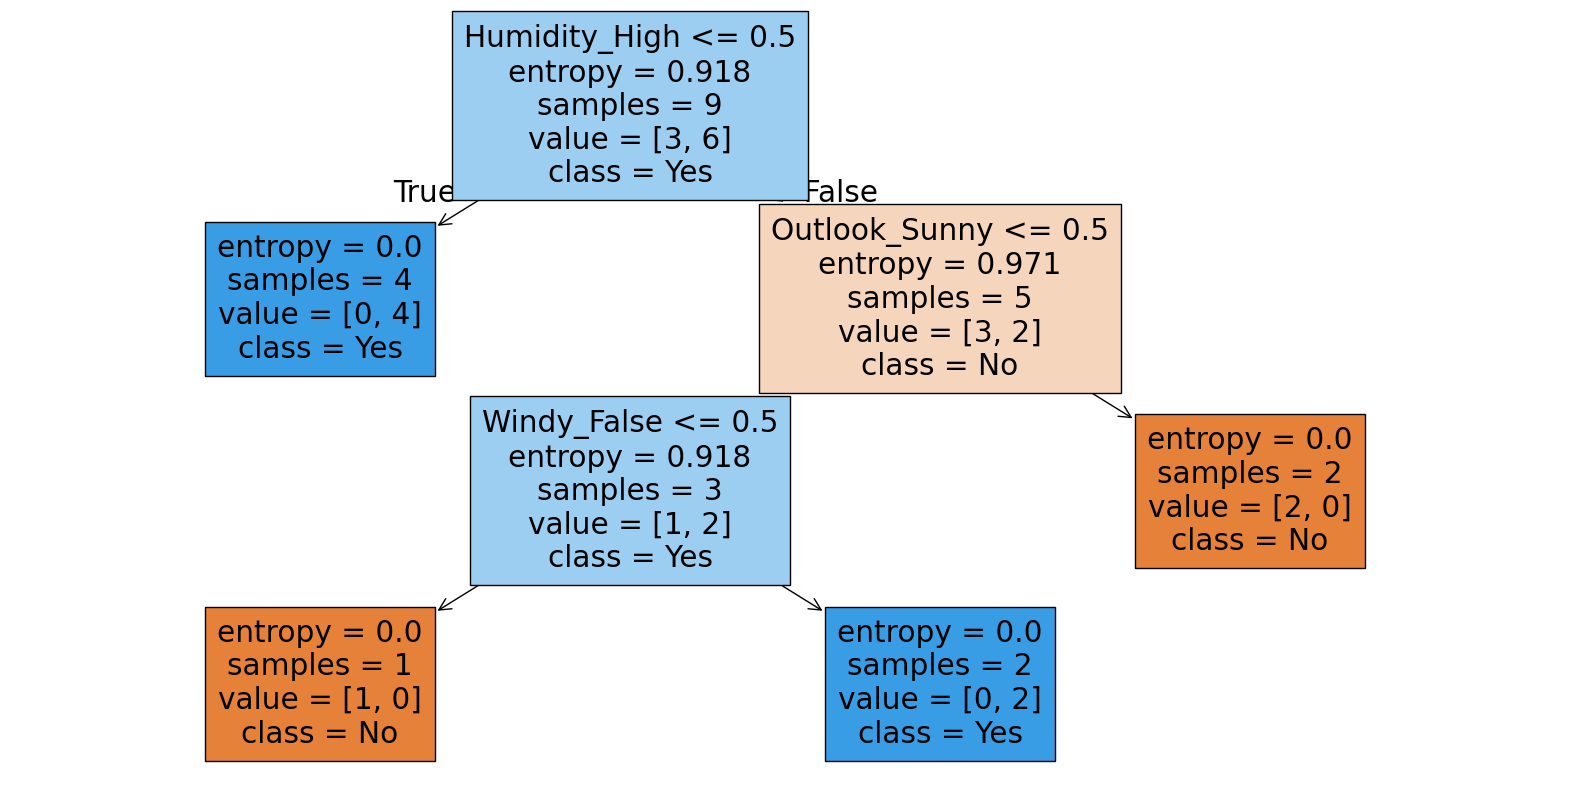

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Corrected data dictionary
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

# Creating the DataFrame
df = pd.DataFrame(data)

# Encoding categorical features
df_encoded = pd.get_dummies(df, columns=['Outlook', 'Temperature', 'Humidity', 'Windy'])

# Encoding target variable
df_encoded['Play'] = df['Play'].apply(lambda x: 1 if x == 'Yes' else 0)

# Splitting the data into features and target
X = df_encoded.drop('Play', axis=1)
y = df_encoded['Play']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing and training the Decision Tree model
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Printing the accuracy and classification report
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plotting the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()
